# Titanic Passenger Data Analysis
This project explores the Titanic dataset to understand passenger demographics, fare distribution, and survival patterns. The dataset is sourced from [Kaggle Titanic Competition](https:://www.kaggle.com/c/titanic/data).

**Key Questions:**

- What is the distribution of passengers by class and gender?
- How does fare vary across classes?
- Which class had the most passengers?
- Which passenger paid the highest fare?

In [21]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
df = pd.read_csv("train.csv")

In [22]:
# Previeew the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Data preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# Data preview
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.shape

(891, 12)

The data set has 891 rows and 12 columns, including variables such as passenger class, age, fare, and survival status.

## Data Cleaning

In [26]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
#drop irrelevant columns
df = df.drop(columns = ["PassengerId", "Ticket", "Cabin"])

In [28]:
# Fill missinng Age with average age
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [29]:
# Verify cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


During the data cleaning process, it was discovered while checking for missing values that there were 177 blank entries in the Age column, 687 in the Cabin column, and 2 in the Embarked column. To clean the dataset, I replaced all Age missing values with the average age, and I dropped three columns: PassengerId, Ticket, and Cabin, which were irrelevant for my analysis.

## Exploratory Data Analysis (EDA)

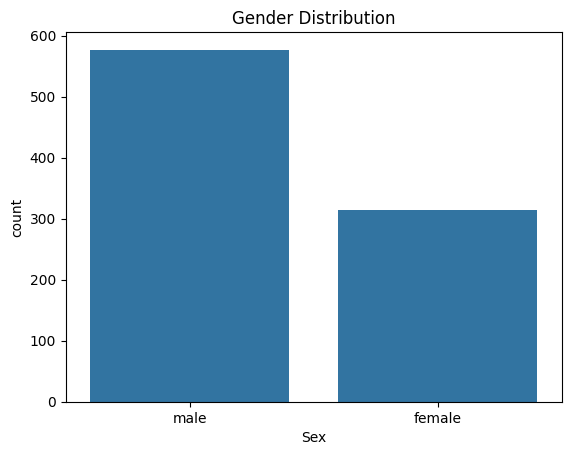

In [30]:
# Gender Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "Sex", data = df)
plt.title("Gender Distribution")
plt.show()

In [31]:
# Count the number of males and females
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

The Sex Distribution bar chart above is a visual representation of the count of the Sex column in the Titanic dataset. There were more males than females, almost, with the total number of males almost doubling the total number of females.

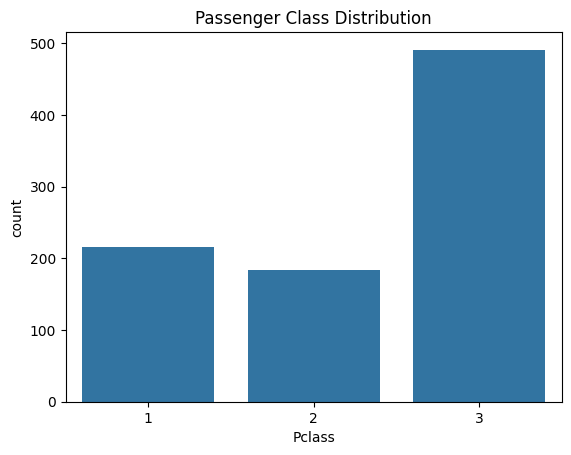

In [32]:
# Passenger Class Distribution
sns.countplot(x = "Pclass", data = df)
plt.title("Passenger Class Distribution")
plt.show()

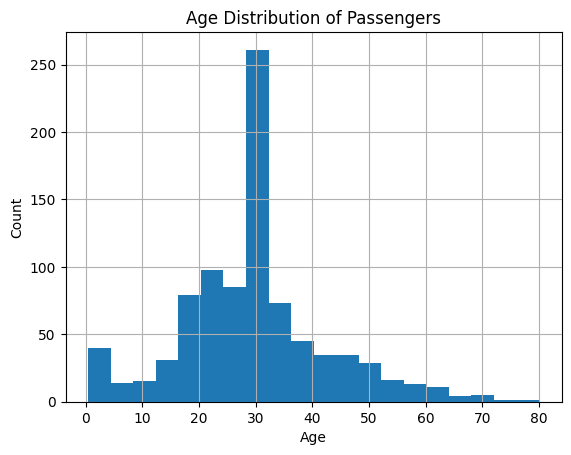

In [33]:
# Age Distribution
df["Age"].hist(bins = 20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

From the Age Distribution histogram above, we can deduce that those around the age of thirty were the most onboard, with a count of above 250, surpassing all other ages. Also, we can see a decline in age from the thirty mark until the age of eighty, which had a very small count.

## Groupby Analysis

In [34]:
df.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

From the result, we can see that Group 1 (Upper Class) had an average fare of 84.15, Group 2 (Middle Class) had an average fare of 20.66, and Group 3 (Lower Class) had an average fare of 13.68.

In [35]:
df.groupby(["Pclass"])["Age"].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

From the above, we can see the average Age of each class group, with Group 1 (Upper Class) having an average age of 37, Group 2 (Middle Class) havong an average age of 30, and Group 3 (Lower Class) having an average age of 26.

In [36]:
df.groupby(["Pclass"])["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

From the above, we can see the total number of survivors in each class with Group 1 (Upper Class) having 136 survivors, Group 2 (Middle Class) having 87 suvivors, and Group 3 (Lower Class) having 119 survivors.

# Fare Category Creation

In [37]:
# Create a function
def fare_category(fare):
    if fare >= 50:
        fare_category = "High"
    elif fare >= 20:
        fare_category = "Medium"
    elif fare < 20:
        fare_category = "Low"
    return fare_category

# Create Fare_Category column and apply fare_category function
df["Fare_Category"] = df["Fare"].apply(fare_category)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Category
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,High
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,High
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Low
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,Low
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,Medium
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,Medium
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,Medium


The DataFrame above is an updated version of the original DataFrame where a new column, Fare_Category, has been added, which checks the value of the fare column and assigns a corresponding "High" if the fare is greater than or equal to 50, "Medium" if the fare is greater than or equal to 20 but at the same time less than 50, and "Low" if the fare is below 20.

In [38]:
# Average per class as a new column
df["Pclass_Avg_Age"] = df.groupby(["Pclass"])["Age"].transform("mean")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Category,Pclass_Avg_Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Low,26.403259
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,High,37.048118
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Low,26.403259
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,High,37.048118
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Low,26.403259


The new column Pclass_Avg_Age is the Average age of passengers in each class. The columns' entries are to match the corresponding Pclass entry. It helps us see the average Age of each row's passenger class.

In [39]:
# Keep classes where average fare > 50
df.groupby(["Pclass"]).filter(lambda x: x["Fare"].mean() > 50).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Category,Pclass_Avg_Age
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,High,37.048118
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,High,37.048118
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,High,37.048118
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S,Medium,37.048118
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5000,S,Medium,37.048118


The Filter above produced a DataFrame in which the class involved had an average fare whose value was above 50. In this case, it was the Low Class (Group 1).

In [40]:
# Top 5 paying Passengers
df.sort_values("Fare", ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Category,Pclass_Avg_Age
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C,High,37.048118
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,High,37.048118
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C,High,37.048118
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,S,High,37.048118
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S,High,37.048118


## Coonclusions

- Total Passengers: 891
- Male: 577, Female: 314.
- Highest average fare: Class 1 ($84.15)
- Highest fare paid by Mr. Thomas Drake Martinez Cardeza ($512.33)

### Key Insights:
- Most passengers were in Class 3.
- Higher class passengers paid significantly more fares.
